***1. Cargar el conjunto de datos***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dengue_abierto(Feb).csv")

***2. Revision del DataFrame***

In [2]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2024-02-26,1304859,1,18,12,1,2,2,12,1,...,2,2,2,2,5.0,1,1,2,12,1
1,2024-02-26,1304862,2,15,7,101,2,2,7,101,...,2,2,2,2,5.0,2,5,1,7,101
2,2024-02-26,1304888,1,9,3,8,2,2,3,8,...,2,2,2,2,5.0,1,5,3,3,8
3,2024-02-26,1304901,2,9,20,401,2,2,20,318,...,2,2,2,2,5.0,2,5,1,20,401
4,2024-02-26,1304920,1,57,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5


***3. Verificacion y manejo de datos faltantes***


In [3]:
# Filtra las columnas numéricas del DataFrame
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Imputa los valores faltantes en las columnas numéricas con la mediana
df_numerico = df_numerico.fillna(df_numerico.median())

# Reemplaza las columnas numéricas en el DataFrame original con las imputadas
for col in df_numerico.columns:
    df[col] = df_numerico[col]


***4. Informacion estadistica basica***

In [4]:
df.describe()

,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,INSTITUCION_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
count,2.979400e+04,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,...,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000,29794.000000
mean,1.317563e+06,1.472713,26.351749,17.158656,31.370242,1.989897,1.987615,17.157112,33.409411,7.459992,...,1.998423,1.999329,1.987514,1.996845,4.996677,1.499497,4.822078,1.590220,17.335235,33.140565
std,9.235200e+03,0.499263,17.350053,8.083936,62.316658,0.100005,0.110599,8.088926,81.251809,5.246653,...,0.039687,0.025901,0.111042,0.056082,0.060948,0.500008,0.629494,0.790513,8.873006,75.897954
min,1.299508e+06,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.309714e+06,1.000000,12.000000,12.000000,2.000000,2.000000,2.000000,12.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.000000,1.000000,12.000000,2.000000
50%,1.317660e+06,1.000000,23.000000,15.000000,7.000000,2.000000,2.000000,15.000000,6.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.000000,1.000000,15.000000,7.000000
75%,1.325486e+06,2.000000,38.000000,24.000000,38.000000,2.000000,2.000000,24.000000,38.000000,12.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,24.000000,38.000000
max,1.333487e+06,2.000000,110.000000,35.000000,570.000000,2.000000,2.000000,32.000000,999.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,3.000000,99.000000,999.000000


***5. Identificacion de variables categoricas***

In [5]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['FECHA_ACTUALIZACION', 'FECHA_SIGN_SINTOMAS'], dtype='object')

***6. Medidas de tendencia central***

In [6]:
def resumen_numerico(df):
    for col in df.select_dtypes(include=['number']):
        print(f"Columna: {col}")
        print(f"Media: {df[col].mean()}")
        print(f"Mediana: {df[col].median()}")
        print(f"Moda: {df[col].mode()}")
        print(f"Desviacion estantdar: {df[col].std()}")
        print()

resumen_numerico(df)

Columna: ID_REGISTRO
Media: 1317563.349902665
Mediana: 1317660.5
Moda: 0        1299508
1        1299543
2        1299553
3        1299559
4        1299569
          ...   
29789    1333483
29790    1333484
29791    1333485
29792    1333486
29793    1333487
Name: ID_REGISTRO, Length: 29794, dtype: int64
Desviacion estantdar: 9235.200284542574

Columna: SEXO
Media: 1.472712626703363
Mediana: 1.0
Moda: 0    1
Name: SEXO, dtype: int64
Desviacion estantdar: 0.4992632226580856

Columna: EDAD_ANOS
Media: 26.35174867422971
Mediana: 23.0
Moda: 0    12
Name: EDAD_ANOS, dtype: int64
Desviacion estantdar: 17.350052554085035

Columna: ENTIDAD_RES
Media: 17.158656105256092
Mediana: 15.0
Moda: 0    12
Name: ENTIDAD_RES, dtype: int64
Desviacion estantdar: 8.083935687405948

Columna: MUNICIPIO_RES
Media: 31.370242330670603
Mediana: 7.0
Moda: 0    1
Name: MUNICIPIO_RES, dtype: int64
Desviacion estantdar: 62.31665844761637

Columna: HABLA_LENGUA_INDIG
Media: 1.9898972947573337
Mediana: 2.0
Moda: 0    2


***7. Conteo de casos por Categoria***

In [7]:
for col in categorical_cols.columns:
    print(df[col].value_counts())

FECHA_ACTUALIZACION
2024-02-26    29794
Name: count, dtype: int64
FECHA_SIGN_SINTOMAS
2024-01-15    835
2024-01-21    773
2024-01-22    768
2024-01-20    761
2024-01-08    750
2024-01-14    734
2024-01-29    707
2024-01-28    691
2024-01-16    686
2024-01-01    669
2024-01-07    661
2024-01-19    661
2024-01-12    648
2024-01-06    647
2024-01-23    642
2024-01-13    639
2024-01-09    631
2024-01-10    623
2024-01-18    616
2024-01-05    604
2024-01-11    597
2024-01-26    590
2024-01-30    585
2024-01-24    578
2024-02-10    578
2024-01-27    577
2024-02-12    570
2024-01-02    565
2024-01-17    562
2024-01-03    557
2024-02-06    553
2024-01-25    552
2024-02-05    548
2024-01-04    547
2024-02-19    531
2024-02-07    504
2024-02-11    495
2024-02-04    476
2024-02-03    474
2024-01-31    474
2024-02-18    468
2024-02-09    463
2024-02-08    462
2024-02-02    457
2024-02-01    443
2024-02-13    424
2024-02-14    423
2024-02-17    419
2024-02-20    407
2024-02-16    374
2024-02-15    

***8. Casos por tipo de dengue***

In [8]:
print(df['TIPO_PACIENTE'].value_counts())

TIPO_PACIENTE
1    23645
2     6149
Name: count, dtype: int64


***9. Fallecimiento por tipo de dengue y edad***

In [9]:
for dengue_type in df['TIPO_PACIENTE'].unique():
    if dengue_type == 1: print(f"Tipo de dengue {dengue_type}: Clasico")
    else: print(f"Tipo de dengue {dengue_type}: Hemorrágico")
    for age in df['EDAD_ANOS'].unique():
        count = (df[(df['TIPO_PACIENTE'] == dengue_type) &
                    (df['EDAD_ANOS'] == age)]['DEFUNCION']).sum()
        print(f"{age} years: {count} deaths")

Tipo de dengue 1: Clasico
18 years: 826 deaths
15 years: 1180 deaths
9 years: 1086 deaths
57 years: 250 deaths
12 years: 1402 deaths
51 years: 496 deaths
30 years: 926 deaths
65 years: 106 deaths
10 years: 1222 deaths
19 years: 804 deaths
5 years: 720 deaths
13 years: 1376 deaths
6 years: 940 deaths
36 years: 670 deaths
17 years: 906 deaths
14 years: 1282 deaths
7 years: 1046 deaths
24 years: 1124 deaths
2 years: 442 deaths
20 years: 996 deaths
11 years: 1222 deaths
8 years: 1178 deaths
45 years: 570 deaths
33 years: 792 deaths
46 years: 574 deaths
55 years: 292 deaths
50 years: 418 deaths
26 years: 898 deaths
61 years: 186 deaths
48 years: 494 deaths
47 years: 522 deaths
32 years: 810 deaths
29 years: 950 deaths
1 years: 484 deaths
4 years: 702 deaths
38 years: 712 deaths
49 years: 476 deaths
28 years: 960 deaths
52 years: 414 deaths
71 years: 66 deaths
53 years: 366 deaths
22 years: 986 deaths
25 years: 1032 deaths
41 years: 676 deaths
37 years: 668 deaths
35 years: 682 deaths
40 yea

93 years: 2 deaths
86 years: 8 deaths
88 years: 6 deaths
94 years: 2 deaths
98 years: 0 deaths
89 years: 8 deaths
110 years: 2 deaths
103 years: 2 deaths
95 years: 2 deaths
Tipo de dengue 2: Hemorrágico
18 years: 325 deaths
15 years: 519 deaths
9 years: 442 deaths
57 years: 58 deaths
12 years: 530 deaths
51 years: 68 deaths
30 years: 158 deaths
65 years: 33 deaths
10 years: 473 deaths
19 years: 278 deaths
5 years: 216 deaths
13 years: 445 deaths
6 years: 279 deaths
36 years: 116 deaths
17 years: 424 deaths
14 years: 502 deaths
7 years: 300 deaths
24 years: 198 deaths
2 years: 98 deaths
20 years: 234 deaths
11 years: 468 deaths
8 years: 434 deaths
45 years: 87 deaths
33 years: 110 deaths
46 years: 83 deaths
55 years: 95 deaths
50 years: 84 deaths
26 years: 164 deaths
61 years: 52 deaths
48 years: 86 deaths
47 years: 106 deaths
32 years: 118 deaths
29 years: 143 deaths
1 years: 109 deaths
4 years: 156 deaths
38 years: 99 deaths
49 years: 87 deaths
28 years: 163 deaths
52 years: 68 deaths

***10. Distribucion de casos por categoria***

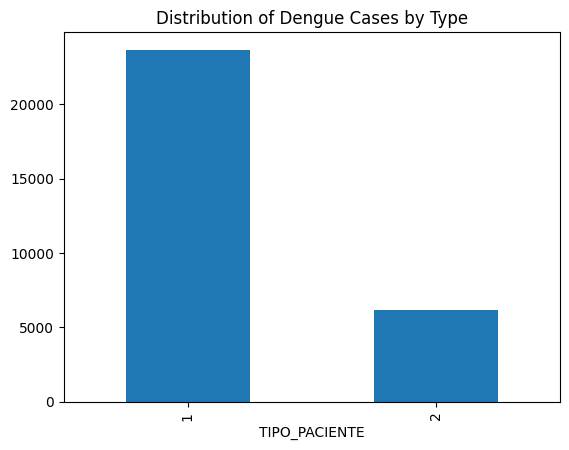

In [10]:
df['TIPO_PACIENTE'].value_counts().plot(kind='bar')
plt.title("Distribution of Dengue Cases by Type")
plt.show()

***11. Casos de dengue por mes***

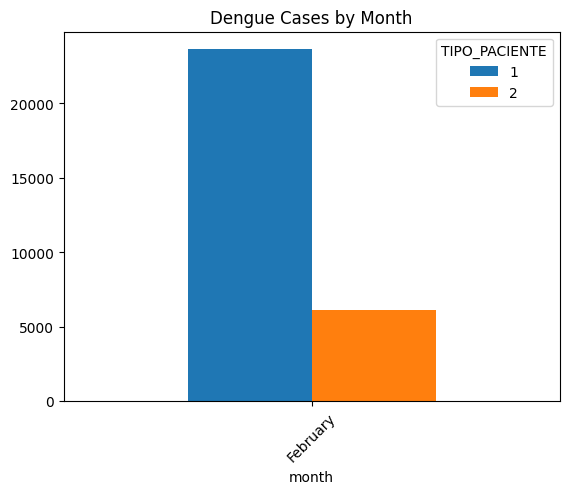

In [11]:
df['month'] = pd.to_datetime(df['FECHA_ACTUALIZACION']).dt.month_name()
df.groupby('month')['TIPO_PACIENTE'].value_counts().unstack().plot(kind='bar')
plt.title("Dengue Cases by Month")
plt.xticks(rotation=45)
plt.show()

***12. Casos de dengue por estado***

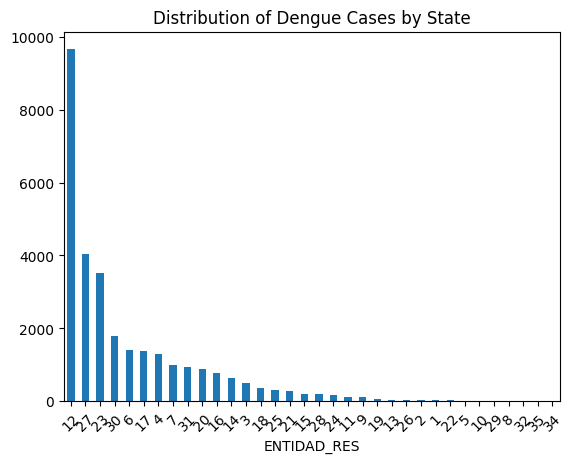

In [12]:
df['ENTIDAD_RES'].value_counts().plot(kind='bar')
plt.title("Distribution of Dengue Cases by State")
plt.xticks(rotation=45)
plt.show()

***13. Correlación entre 2 variables***

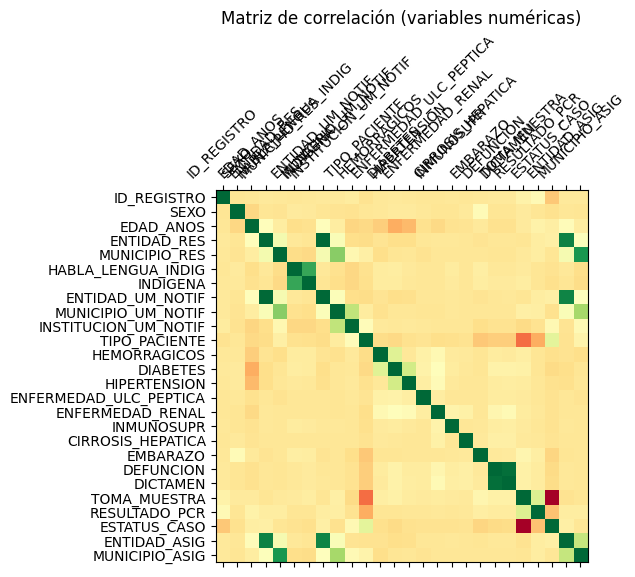

Correlación entre 'EDAD_ANOS' y 'HEMORRAGICOS': -0.1089139360260114


In [13]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = df_numerico.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.matshow(corr_matrix, cmap='RdYlGn')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

# Imprimir la correlación entre dos variables específicas
print(f"Correlación entre 'EDAD_ANOS' y 'HEMORRAGICOS': {corr_matrix['EDAD_ANOS']['HEMORRAGICOS']}")



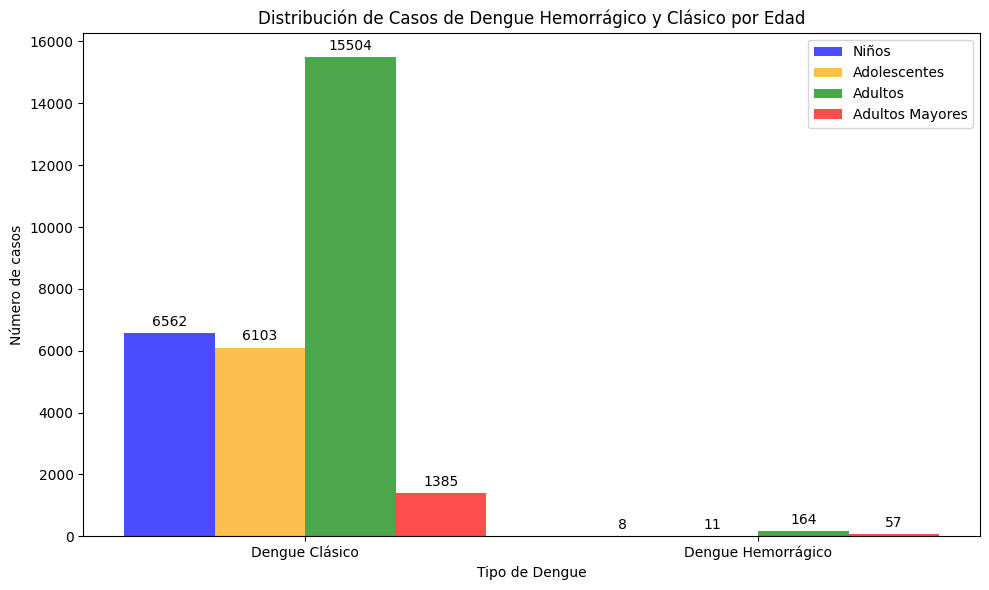

In [14]:
# Agregamos una gráfica de barras del campo EDAD_ANOS del dataset
# Categorizar los casos por grupos de edad
# Niños menores de 12 años
# Adolescentes de 12 y menores de 20 años
# Adultos =>20 y <60
# Adulto mayor >= 60
niños = df[df["EDAD_ANOS"] < 12]["HEMORRAGICOS"].value_counts()
adolescentes = df[(df["EDAD_ANOS"] >= 12) & (df["EDAD_ANOS"] < 20)]["HEMORRAGICOS"].value_counts()
adultos = df[(df["EDAD_ANOS"] >= 20) & (df["EDAD_ANOS"] < 60)]["HEMORRAGICOS"].value_counts()
adultos_mayores = df[df["EDAD_ANOS"] >= 60]["HEMORRAGICOS"].value_counts()

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los datos
niños = plt.bar([0, 1], niños, color='blue', alpha=0.7, width=0.2, label='Niños')
adolescentes_bars = plt.bar([0.2, 1.2], adolescentes, color='orange', alpha=0.7, width=0.2, label='Adolescentes')
adultos_bars = plt.bar([0.4, 1.4], adultos, color='green', alpha=0.7, width=0.2, label='Adultos')
adultos_mayores_bars = plt.bar([0.6, 1.6], adultos_mayores, color='red', alpha=0.7, width=0.2, label='Adultos Mayores')

# Configurar la gráfica
plt.title('Distribución de Casos de Dengue Hemorrágico y Clásico por Edad')
plt.xlabel('Tipo de Dengue')
plt.ylabel('Número de casos')
plt.xticks([0.3, 1.3], ['Dengue Clásico', 'Dengue Hemorrágico'])
plt.legend()
plt.tight_layout()

# Agregar etiquetas de número a cada barra
for bars in [niños, adolescentes_bars, adultos_bars, adultos_mayores_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

Número de casos con hemorragias: 240
Número de casos con diabetes: 618
Número de casos con hipertensión: 402
Número de casos con enfermedad ulceropeptica: 15
Número de casos con enfermedad renal: 74
Número de casos con inmunosupresión: 47
Número de casos con cirrosis hepática: 20
Número de casos de pacientes embarazadas: 372


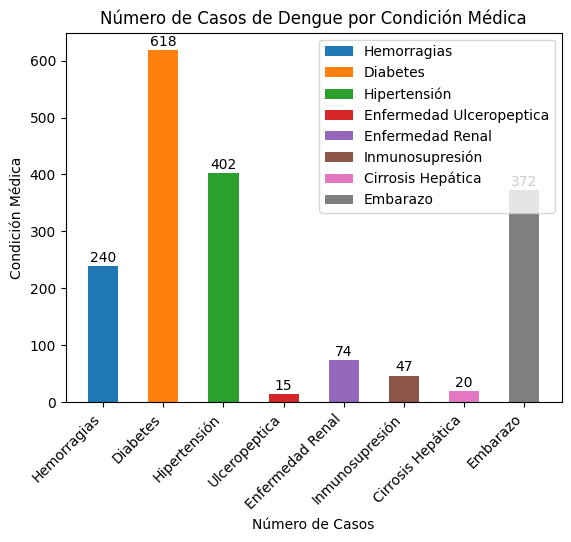

In [15]:
# Contar el número de casos por categoría de HEMORRAGICOS
# Suponiendo que 1 representa la presencia de la condición
hemorragicos = df[df["HEMORRAGICOS"] == 1]
num_hemorragicos = len(hemorragicos)
print("Número de casos con hemorragias:", num_hemorragicos)

# Repite el mismo proceso para las otras variables
diabetes = df[df["DIABETES"] == 1]
num_diabetes = len(diabetes)
print("Número de casos con diabetes:", num_diabetes)

hipertension = df[df["HIPERTENSION"] == 1]
num_hipertension = len(hipertension)
print("Número de casos con hipertensión:", num_hipertension)

ulc_peptica = df[df["ENFERMEDAD_ULC_PEPTICA"] == 1]
num_ulc_peptica = len(ulc_peptica)
print("Número de casos con enfermedad ulceropeptica:", num_ulc_peptica)

enfermedad_renal = df[df["ENFERMEDAD_RENAL"] == 1]
num_enfermedad_renal = len(enfermedad_renal)
print("Número de casos con enfermedad renal:", num_enfermedad_renal)

inmunosupr = df[df["INMUNOSUPR"] == 1]
num_inmunosupr = len(inmunosupr)
print("Número de casos con inmunosupresión:", num_inmunosupr)

cirrosis_hepatica = df[df["CIRROSIS_HEPATICA"] == 1]
num_cirrosis_hepatica = len(cirrosis_hepatica)
print("Número de casos con cirrosis hepática:", num_cirrosis_hepatica)

embarazo = df[df["EMBARAZO"] == 1]
num_embarazo = len(embarazo)
print("Número de casos de pacientes embarazadas:", num_embarazo)

fig, ax = plt.subplots()
ax.bar('Hemorragias', num_hemorragicos, 0.5, label='Hemorragias')
ax.bar('Diabetes', num_diabetes, 0.5, label='Diabetes')
ax.bar('Hipertensión', num_hipertension, 0.5, label='Hipertensión')
ax.bar('Ulceropeptica', num_ulc_peptica, 0.5, label='Enfermedad Ulceropeptica')
ax.bar('Enfermedad Renal', num_enfermedad_renal, 0.5, label='Enfermedad Renal')
ax.bar('Inmunosupresión', num_inmunosupr, 0.5, label='Inmunosupresión')
ax.bar('Cirrosis Hepática', num_cirrosis_hepatica, 0.5, label='Cirrosis Hepática')
ax.bar('Embarazo', num_embarazo, 0.5, label='Embarazo')

ax.set_xlabel('Número de Casos')
ax.set_ylabel('Condición Médica')
ax.set_title('Número de Casos de Dengue por Condición Médica')
# Agregar las cantidades encima de cada barra
for i, v in enumerate([num_hemorragicos, num_diabetes, num_hipertension, num_ulc_peptica, num_enfermedad_renal,num_inmunosupr, num_cirrosis_hepatica, num_embarazo]):
    ax.annotate(str(v), xy=(i, v), xytext=(0, 3), textcoords="offset points", ha='center')
# a 45 grados
plt.xticks(rotation=45, ha='right')
# Colocar la leyenda en la esquina superior derecha
ax.legend(loc='upper right')
plt.show()

SEXO
1    15710
2    14084
Name: count, dtype: int64


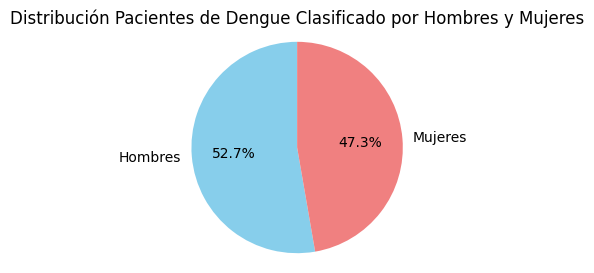

In [16]:
# Número de hombres y mujeres en el dataset
# Contar los valores de la columna "Sexo"
numporSexo = df["SEXO"].value_counts()
print(numporSexo)
# Crear la gráfica de pastel
plt.figure(figsize=(3, 3))
plt.pie(numporSexo, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribución Pacientes de Dengue Clasificado por Hombres y Mujeres')
# Para que el gráfico de pastel sea circular
plt.axis('equal')
plt.show()

Fallecidos:HEMORRAGICOS
2    90
1     4
Name: count, dtype: int64 


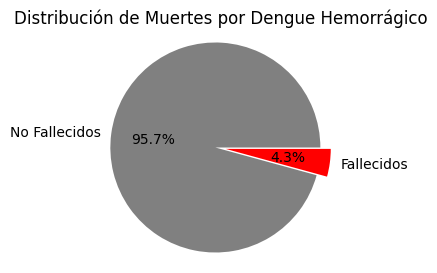

In [17]:
# calcula el porcentaje de personas fallecidas y no fallecidas utilizando el campo "DEFUNCION"
labels = ['No Fallecidos','Fallecidos' ]
colors = ['grey', 'red']
# Imprimir cantidad de fallecidos por dengue hemorrágico
fallecidos = df[df['DEFUNCION'] == 1]['HEMORRAGICOS'].value_counts()
print("Fallecidos:{} ".format(fallecidos))

# Crear la figura con un tamaño específico
plt.figure(figsize=(3, 3))
# Resaltar la porción de fallecidos
explode = (0.1, 0)
# Graficar pastel
plt.pie(fallecidos, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribución de Muertes por Dengue Hemorrágico')
plt.axis('equal')
plt.show()

Mediana: 23.0
Cuartil 1: 12.0
Cuartil 2: 23.0
Cuartil 3: 38.0
Cantidad de valores atípicos (EDAD_ANOS >= 80): 126


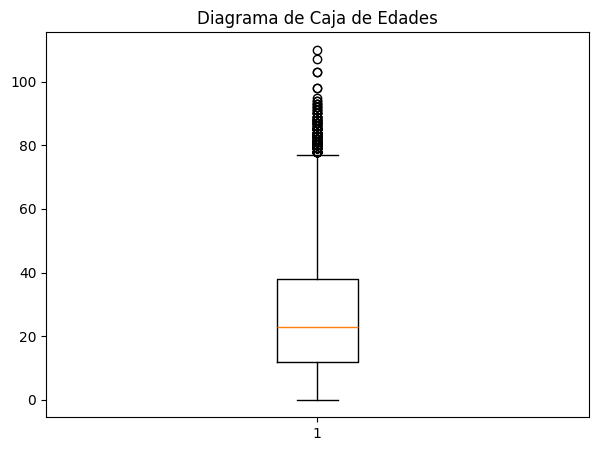

In [18]:
# Calcular los cuartiles
median = df['EDAD_ANOS'].median()
q1 = df['EDAD_ANOS'].quantile(0.25)
q2 = df['EDAD_ANOS'].quantile(0.50)
q3 = df['EDAD_ANOS'].quantile(0.75)

print("Mediana:", median)
print("Cuartil 1:", q1)
print("Cuartil 2:", q2)
print("Cuartil 3:", q3)


# Filtrar los valores atípicos
atipicos = df[df['EDAD_ANOS'] >= 80]['EDAD_ANOS']
# Contar los valores atípicos
num_atipicos = atipicos.count()
# Mostrar la cantidad de valores atípicos
print("Cantidad de valores atípicos (EDAD_ANOS >= 80):", num_atipicos)

# Crear el diagrama de caja
plt.figure(figsize=(7, 5))
plt.boxplot(df['EDAD_ANOS'], vert=True)
plt.title('Diagrama de Caja de Edades')

plt.show()

Well, in this February dengue dataset, although the data changes, what is done, such as the operations or rather procedures, so to speak, are similar to those done in one of the previous activities related to a similar dataset. But I can say that, as with the previous dataset, I have learned to extract relevant features from these datasets using different formulas that I have seen in the data analysis and visualization classes that have helped me to understand the nature of the data in the datasets that exist in data science this is why I reused several things from the previous Jupyter work.